# Logistic Regression

## About Algorithm

### What is Logistic Regression
    1. Logistic regression is classifier which classifies data using likelihood function. We calculate the probability and it should be close to either of the classes( close to 1 or close to 0.)
    2. Odd (X) = P(X) / (1 - P(X))
    3. Odds_ratio(x , y) = odds(x) / odd(y); If the value of x is increased by 1 unit, the odds of y increases by odds_ration times.
    4. ln(odds) = ln( p/(1-p)) = logit(p) = ln(p) - ln(1-p); This is the likelihood function. Here the independent variable will be in Y axis and the dependent variable variable will be on X axis.
    5. Since we need independent variable on Y axis, we take inverse natural log. log^-1 = e^x/(1+e^x)
    6. Natural logarithm of the odds ration is equivalent to a liner function of the independent variables. So end up at the equation,
        1. P= e^(β0+β1*x1) / (1+ e^(β0+β1*x1))
    7. The odds ratio of 1 unit difference will be the coefficient of the attribute.

### Cons
    1. Overfitting 
    2. Computation increases with increase in data points.


## About Notebook

### Problem statement
    Predect whether a person will have heart disease in 10 years or not based on the given attributs.
        
### Dataset
    1. Dataset has 4238 data points and 16 attributes.
    2. Attributes are,
        1. male (1- male, 0 Female)
        2. Age
        3. education (since it has noting to deal with health, it is dropped)
        4. currentSmoker (1 if the smoker or else 0)
        5. cigsPerDay: Number of cigarets per day)
        6. BPMeds (patient was on blood pressure medication or not)
        7. prevalentStroke (whether or not the patient had previously had a stroke)
        8. prevalentHyp (whether or not the patient was hypertensive)
        9. diabetes(whether or not the patient was diabetes)
        10. totChol (total cholesterol level)
        11. sysBP (systolic blood pressure)
        12. diaBP (diastolic blood pressure)
        13. BMI (Body Mass Index)
        14. heartRate (heart rate)
        15. glucose (glucose level)
        16. TenYearCHD (person was diabetic or not)
    3. Necessary modules are imported.
    4. Data is loaded using pandas
    5. NaN values are removed and cleaned.
    6. Data is divided into independent variables and dependent variables.
    7. Dataset is divided into train and test sets.
    8. Module is trained and tested.
    9. Module is evaluated using confusion matrix and model summary
    
    ### Output Interpretation
    1. Accuracy can be evaluated using confusion matrix. Which is a square matrix and its size depends on number of Classed
    2. Important Terminologies
        1. TN / True Negative: when a case was negative and predicted negative
        2. TP / True Positive: when a case was positive and predicted positive
        3. FN / False Negative: when a case was positive but predicted negative
        4. FP / False Positive: when a case was negative but predicted positive.
    3. Precession:
        1. Describes what percentage of your prediction were correct
        2. Precession = TP/(TP+FP)
    4. Recall:
        1. Describes what percentage of the positive cases did you catch.
        2. Recall = TP/(TP+FN)
    5. F1 Score
        1. Describe what percentage of the positive prediction were correct
        2. F1 Score = s((Recall*Precession)/(Recall+Precession))
    6. Using Intercept and Coefficent of each variables of the regression line, probability is calculated.

In [1]:
#import necessary modules
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data using pandas
url = r'https://raw.githubusercontent.com/iamchiragshekars/Machine-Learning/master/Datasets/framingham.csv'
dataset = pa.read_csv(url)

In [3]:
#verify data load
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#get basic information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
male               4238 non-null int64
age                4238 non-null int64
education          4133 non-null float64
currentSmoker      4238 non-null int64
cigsPerDay         4209 non-null float64
BPMeds             4185 non-null float64
prevalentStroke    4238 non-null int64
prevalentHyp       4238 non-null int64
diabetes           4238 non-null int64
totChol            4188 non-null float64
sysBP              4238 non-null float64
diaBP              4238 non-null float64
BMI                4219 non-null float64
heartRate          4237 non-null float64
glucose            3850 non-null float64
TenYearCHD         4238 non-null int64
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
#get 5 point summary of the data
dataset.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


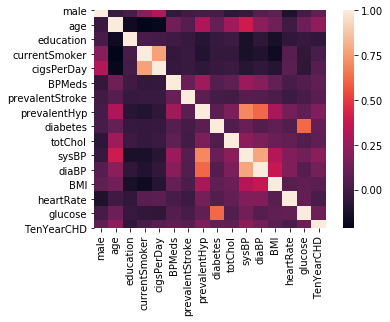

In [6]:
#check correlation
sns.heatmap(dataset.corr(),square=True)

In [7]:
dataset.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


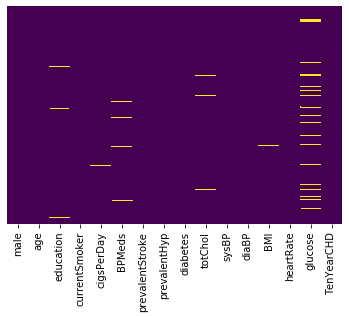

In [8]:
#check for null values
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

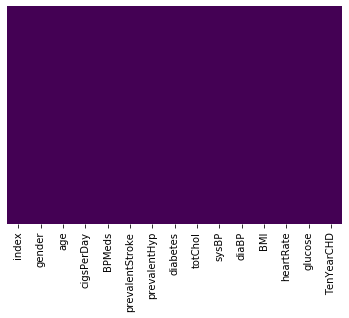

In [13]:
#drop education
dataset = dataset.drop({'education','currentSmoker'},axis=1)
dataset = dataset.dropna().reset_index()

#rename male feature to gender
dataset = dataset.rename(columns={'male': 'gender'})

#remove rows with null value
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
#split data into independent and dependent datsset
X = dataset.iloc[:,1:-1]
Y = dataset.iloc[:,-1]

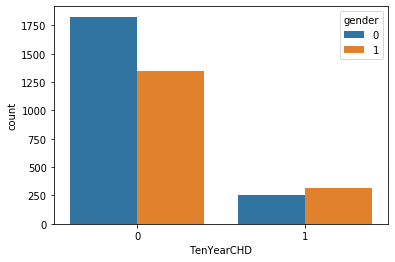

In [15]:
sns.countplot(x='TenYearCHD', hue='gender', data=dataset)

In [25]:
#dividing dataset into trainig and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [26]:
#fitting model
from sklearn.linear_model import LogisticRegression#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
#predictions
y_pred = logmodel.predict(X_test)

In [28]:
#report about the modle which describes the efficency
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[948   5]
 [163   9]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       953
           1       0.64      0.05      0.10       172

    accuracy                           0.85      1125
   macro avg       0.75      0.52      0.51      1125
weighted avg       0.82      0.85      0.79      1125



## Calculating using formula

In [29]:
#co-efficents of the linear line
logmodel.coef_

array([[ 5.12909917e-01,  4.85018927e-02,  1.74724489e-02,
         1.62930911e-01,  8.27158221e-01,  4.32818345e-01,
         4.08603466e-01,  2.01618887e-04,  1.80511825e-02,
        -2.08847039e-02, -1.76554142e-02, -5.48593494e-03,
         6.77464045e-03]])

In [30]:
#intercept of the linear line
logmodel.intercept_

array([-5.23815273])

In [31]:
#calculating the fx value
temp = []
test_data = X_test.iloc[1]
co_efficent = logmodel.coef_
for i in range(0,test_data.size):
    temp.append(test_data[i] * co_efficent[0,i])

In [32]:
fx = np.sum(temp) + logmodel.intercept_

In [33]:
#since the value is closed to 0, the person will not be diabitic
p = np.exp(fx) / (1 + np.exp(fx))
p

array([0.06483138])

In [38]:
#predecting the value for 1 test case
array= np.array(test_data)
logmodel.predict(array.reshape(1, -1))

array([0])

In [39]:
test_data

gender               0.00
age                 39.00
cigsPerDay           8.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         0.00
diabetes             0.00
totChol            192.00
sysBP              109.00
diaBP               61.00
BMI                 23.36
heartRate           64.00
glucose             84.00
Name: 3374, dtype: float64